In [1]:
pip install tensorflow --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow keras scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dropout, SpatialDropout1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [19]:
import keras_tuner as KeraTuner

In [20]:
dataset = pd.read_csv('Phishing.csv')

# LSTM-CNN Model (Initial modelling)

In [21]:
import seaborn as SeaB
import matplotlib.pyplot as MatPlt

In [22]:
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
# Extract features and target
FeaturesX = dataset.iloc[:, :-1].values
Targety = dataset.iloc[:, -1].values

In [24]:
# Convert target variable to numeric if needed
if Targety.dtype == 'O':  # Check if the dtype is 'O' (object), which means it contains strings
    label_encoder = LabelEncoder()
    Targety = label_encoder.fit_transform(Targety)

In [25]:
# Split the dataset
FeaturesX_train, FeaturesX_test, Targety_train, Targety_test = train_test_split(FeaturesX, Targety, test_size=0.2, random_state=42)

In [26]:
# Check for infinite values and replace with NaN
FeaturesX_train = np.where(np.isinf(FeaturesX_train), np.nan, FeaturesX_train)
FeaturesX_test = np.where(np.isinf(FeaturesX_test), np.nan, FeaturesX_test)

In [27]:
# Check for NaN values and replace with column mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
FeaturesX_train = imputer.fit_transform(FeaturesX_train)
FeaturesX_test = imputer.transform(FeaturesX_test)

In [28]:
# Scale the features
scaler = StandardScaler()
FeaturesX_train = scaler.fit_transform(FeaturesX_train)
FeaturesX_test = scaler.transform(FeaturesX_test)

In [29]:
# Reshape for LSTM-CNN
FeaturesX_train = np.reshape(FeaturesX_train, (FeaturesX_train.shape[0], FeaturesX_train.shape[1], 1))
FeaturesX_test = np.reshape(FeaturesX_test, (FeaturesX_test.shape[0], FeaturesX_test.shape[1], 1))

In [30]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
# Define LSTM-CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

modelCNN_LSTM = Sequential()
modelCNN_LSTM.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(FeaturesX_train.shape[1], 1)))
modelCNN_LSTM.add(MaxPooling1D(pool_size=2))
modelCNN_LSTM.add(BatchNormalization())
modelCNN_LSTM.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
modelCNN_LSTM.add(MaxPooling1D(pool_size=2))
modelCNN_LSTM.add(BatchNormalization())
modelCNN_LSTM.add(LSTM(100, return_sequences=True))
modelCNN_LSTM.add(Dropout(0.5))
modelCNN_LSTM.add(LSTM(50))
modelCNN_LSTM.add(Dense(100, activation='relu'))
modelCNN_LSTM.add(Dropout(0.5))
modelCNN_LSTM.add(Dense(1, activation='sigmoid'))

modelCNN_LSTM.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

modelCNN_LSTM.summary()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

C:\Users\adomi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 75, 128)        │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 37, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 37, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 35, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 17, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 17, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 17, 100)        │        66,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 17, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,577 (498.35 KB)

 Trainable params: 127,193 (496.85 KB)

 Non-trainable params: 384 (1.50 KB)

In [32]:
# Train the model
history = modelCNN_LSTM.fit(FeaturesX_train, Targety_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = modelCNN_LSTM.evaluate(FeaturesX_test, Targety_test, verbose=0)

print(f'Test Loss: {loss:.2f}')
print(f'Test Loss: {loss * 100:.2f}%')
print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Epoch 1/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8337 - loss: 0.3463 - val_accuracy: 0.6185 - val_loss: 0.5615
Epoch 2/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9554 - loss: 0.1198 - val_accuracy: 0.9630 - val_loss: 0.1154
Epoch 3/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9682 - loss: 0.0912 - val_accuracy: 0.9601 - val_loss: 0.0991
Epoch 4/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9651 - loss: 0.0952 - val_accuracy: 0.9671 - val_loss: 0.0898
Epoch 5/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9750 - loss: 0.0698 - val_accuracy: 0.9646 - val_loss: 0.0972
Epoch 6/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9768 - loss: 0.0663 - val_accuracy: 0.9703 - val_loss: 0.0867
Epoch 7/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9788 - loss: 0.0532 - val_accuracy: 0.9691 - val_loss: 0.0799
Epoch 8/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9856 - loss: 0.0397 - val_ac

In [33]:
Targety_predict = (modelCNN_LSTM.predict(FeaturesX_test) > 0.5).astype("int32")

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [34]:
print("Confusion Matrix:")
ConfMatrix = confusion_matrix(Targety_test, Targety_predict)
print(ConfMatrix)

Confusion Matrix:
[[1514   45]
 [  36 1479]]


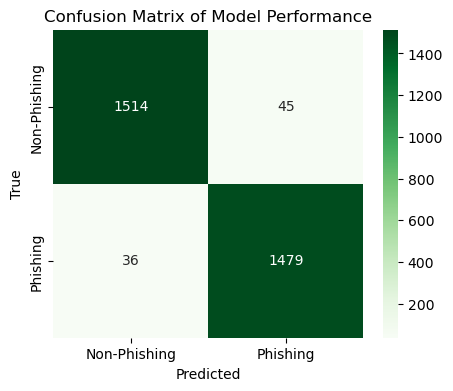

In [35]:
MatPlt.figure(figsize = (5, 4))
SeaB.heatmap(ConfMatrix, annot = True, fmt = 'd', cmap = 'Greens', xticklabels = ['Non-Phishing', 'Phishing'], yticklabels = ['Non-Phishing', 'Phishing'])
MatPlt.xlabel('Predicted')
MatPlt.ylabel('True')
MatPlt.title('Confusion Matrix of Model Performance')
MatPlt.show()

In [36]:
print("\nClassification Report:")
print(classification_report(Targety_test, Targety_predict))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1559
           1       0.97      0.98      0.97      1515

    accuracy                           0.97      3074
   macro avg       0.97      0.97      0.97      3074
weighted avg       0.97      0.97      0.97      3074



In [37]:
Erate = (1 - accuracy)
PErate = (Erate * 100)
print(f'Error Rate: {Erate:.2f}')
print(f'Percentage Error Rate: {Erate * 100:.2f}%')

Error Rate: 0.03
Percentage Error Rate: 2.64%


# Optimization of Model

In [38]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop

In [39]:
def build_model(hp):
    modelCNN_LSTM = Sequential()
    
    # Add Conv1D layers with hyperparameters
    modelCNN_LSTM.add(Conv1D(
        filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
        activation='relu',
        input_shape=(FeaturesX_train.shape[1], 1)
    ))
    modelCNN_LSTM.add(BatchNormalization())
    modelCNN_LSTM.add(MaxPooling1D(pool_size=2))
    modelCNN_LSTM.add(Conv1D(
        filters=hp.Int('filters_2', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
        activation='relu'
    ))
    modelCNN_LSTM.add(BatchNormalization())
    modelCNN_LSTM.add(MaxPooling1D(pool_size=2))
    
    # Reshape data for LSTM
    modelCNN_LSTM.add(LSTM(
        units=hp.Int('lstm_units', min_value=50, max_value=200, step=50)
    ))
    
    # Add Dense layers
    modelCNN_LSTM.add(Dense(
        units=hp.Int('dense_units', min_value=50, max_value=200, step=50),
        activation='relu'
    ))
    modelCNN_LSTM.add(Dropout(
        rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    ))
    modelCNN_LSTM.add(Dense(1, activation='sigmoid'))
    
    modelCNN_LSTM.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])
    return modelCNN_LSTM

In [40]:
from keras_tuner import RandomSearch

# Reshape input data to add the channel dimension
FeaturesX_train_reshaped = FeaturesX_train.reshape((FeaturesX_train.shape[0], FeaturesX_train.shape[1], 1))
FeaturesX_test_reshaped = FeaturesX_test.reshape((FeaturesX_test.shape[0], FeaturesX_test.shape[1], 1))

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='my_dir',
    project_name='cnn_lstm_tuning'
)

# Perform the search
tuner.search(FeaturesX_train_reshaped, Targety_train, epochs=20, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Print the summary of the best model
best_model.summary()

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(FeaturesX_test_reshaped, Targety_test)
print(f"Test Accuracy: {test_accuracy}")

history = best_model.fit(FeaturesX_train_reshaped, Targety_train, epochs=30, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate again after retraining
test_loss, test_accuracy = best_model.evaluate(FeaturesX_test_reshaped, Targety_test)
print(f'Test Loss: {test_loss:.2f}')
print(f'Test Loss: {test_loss * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Reloading Tuner from my_dir\cnn_lstm_tuning\tuner0.json



C:\Users\adomi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\adomi\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 17 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 75, 64)         │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 75, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 37, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 33, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 33, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │        91,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,241 (602.50 KB)

 Trainable params: 153,857 (601.00 KB)

 Non-trainable params: 384 (1.50 KB)

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9790 - loss: 0.0938
Test Accuracy: 0.9762524366378784
Epoch 1/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9963 - loss: 0.0125 - val_accuracy: 0.9776 - val_loss: 0.0985
Epoch 2/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9967 - loss: 0.0089 - val_accuracy: 0.9801 - val_loss: 0.1097
Epoch 3/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9967 - loss: 0.0071 - val_accuracy: 0.9805 - val_loss: 0.1078
Epoch 4/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9980 - loss: 0.0069 - val_accuracy: 0.9728 - val_loss: 0.1635
Epoch 5/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9982 - loss: 0.0064 - val_accuracy: 0.9789 - val_loss: 0.1130
Epoch 6/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9983 - loss: 0.0042 - val_accuracy: 0.9825 - val_loss: 0.1286
Epoch 7/30
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9989 - loss: 0.0030 - val_accuracy: 0.9805 - val_los

In [41]:
loss, accuracy = best_model.evaluate(FeaturesX_test_reshaped, Targety_test, verbose=0)
print(f'Test Loss: {test_loss:.2f}')
print(f'Test Loss: {test_loss * 100:.2f}%')

print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Loss: 0.23
Test Loss: 23.29%
Test Accuracy: 0.98
Test Accuracy: 98.02%


In [42]:
TargetY_Predict = (best_model.predict(FeaturesX_test_reshaped) > 0.5).astype("int32")

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [43]:
print("Confusion Matrix of Tuned Model:")
ConfMatrixOpt = confusion_matrix(Targety_test, TargetY_Predict)
print(ConfMatrixOpt)

Confusion Matrix of Tuned Model:
[[1542   17]
 [  44 1471]]


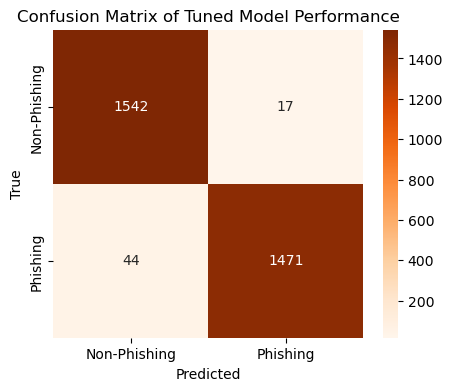

In [44]:
MatPlt.figure(figsize = (5, 4))
SeaB.heatmap(ConfMatrixOpt, annot = True, fmt = 'd', cmap = 'Oranges', xticklabels = ['Non-Phishing', 'Phishing'], yticklabels = ['Non-Phishing', 'Phishing'])
MatPlt.xlabel('Predicted')
MatPlt.ylabel('True')
MatPlt.title('Confusion Matrix of Tuned Model Performance')
MatPlt.show()

In [45]:
print("\nClassification Report of Tuned Model:")
print(classification_report(Targety_test, TargetY_Predict))


Classification Report of Tuned Model:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1559
           1       0.99      0.97      0.98      1515

    accuracy                           0.98      3074
   macro avg       0.98      0.98      0.98      3074
weighted avg       0.98      0.98      0.98      3074



In [46]:
ErateOpt = (1 - test_accuracy)
PErateOpt = (Erate * 100)
print(f'Error Rate of Tuned Model: {ErateOpt:.2f}')
print(f'Percentage Error Rate of Tuned Model: {PErateOpt:.2f}%')

Error Rate of Tuned Model: 0.02
Percentage Error Rate of Tuned Model: 2.64%
